# Exercise from course using gray

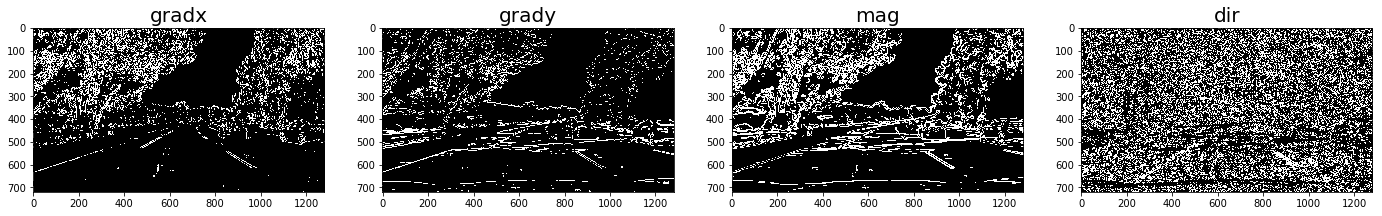

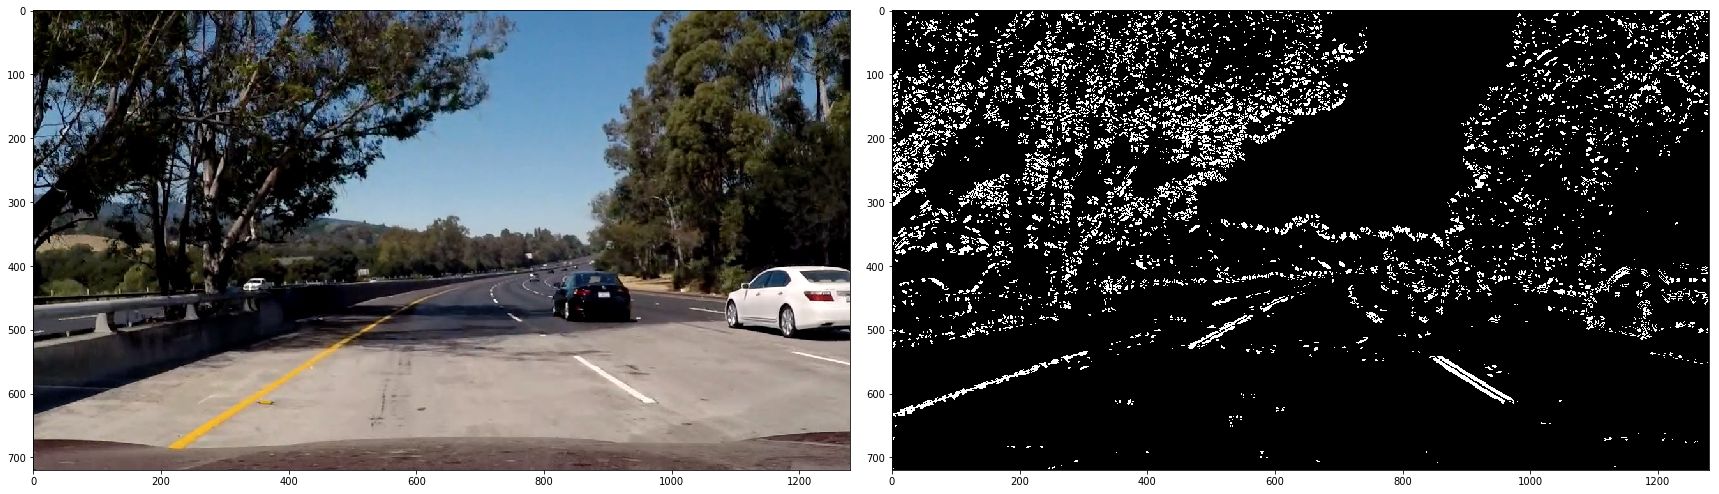

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

# Read in an image and grayscale it
#image = mpimg.imread('signs_vehicles_xygrad.png')
image = mpimg.imread('bridge_shadow.jpg')

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    abs_sobel = np.abs(sobel)
    scaled = np.uint8(255.0 * abs_sobel / np.max(abs_sobel))
    
    mask = (scaled >= thresh[0]) & (scaled <= thresh[1])
    grad_binary = np.zeros_like(gray)
    grad_binary[mask] = 1
    
    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    mag = np.sqrt(sobelx ** 2 + sobely ** 2)
    scaled = np.uint8(255.0 * mag / np.max(mag))
    
    mask = (scaled >= mag_thresh[0]) & (scaled <= mag_thresh[1])
    mag_binary = np.zeros_like(gray)
    mag_binary[mask] = 1
    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    dir_sobel = np.arctan2(np.abs(sobely), np.abs(sobelx))
    
    mask = (dir_sobel >= thresh[0]) & (dir_sobel <= thresh[1])
    dir_binary = np.zeros_like(gray)
    dir_binary[mask] = 1
    return dir_binary

# Choose a Sobel kernel size
ksize = 7 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 90))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 140))
mag_binary = mag_thresh(image, sobel_kernel=21, mag_thresh=(30, 90))
dir_binary = dir_threshold(image, sobel_kernel=19, thresh=(40 * np.pi / 180.0, 73 * np.pi / 180))

# plt.figure()
# plt.imshow(mag_binary, cmap='gray')

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24,9))
ax1.imshow(gradx, cmap='gray')
ax1.set_title('gradx', fontsize=20)
ax2.imshow(grady, cmap='gray')
ax2.set_title('grady', fontsize=20)
ax3.imshow(mag_binary, cmap='gray')
ax3.set_title('mag', fontsize=20)
ax4.imshow(dir_binary, cmap='gray')
ax4.set_title('dir', fontsize=20)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(24,9))
f.tight_layout()

ax1.imshow(image)
ax2.imshow(combined, cmap='gray')
plt.show()


# Using HLS rather than gray

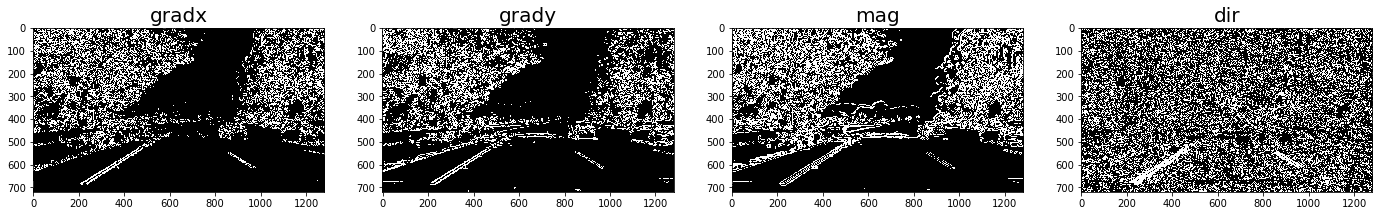

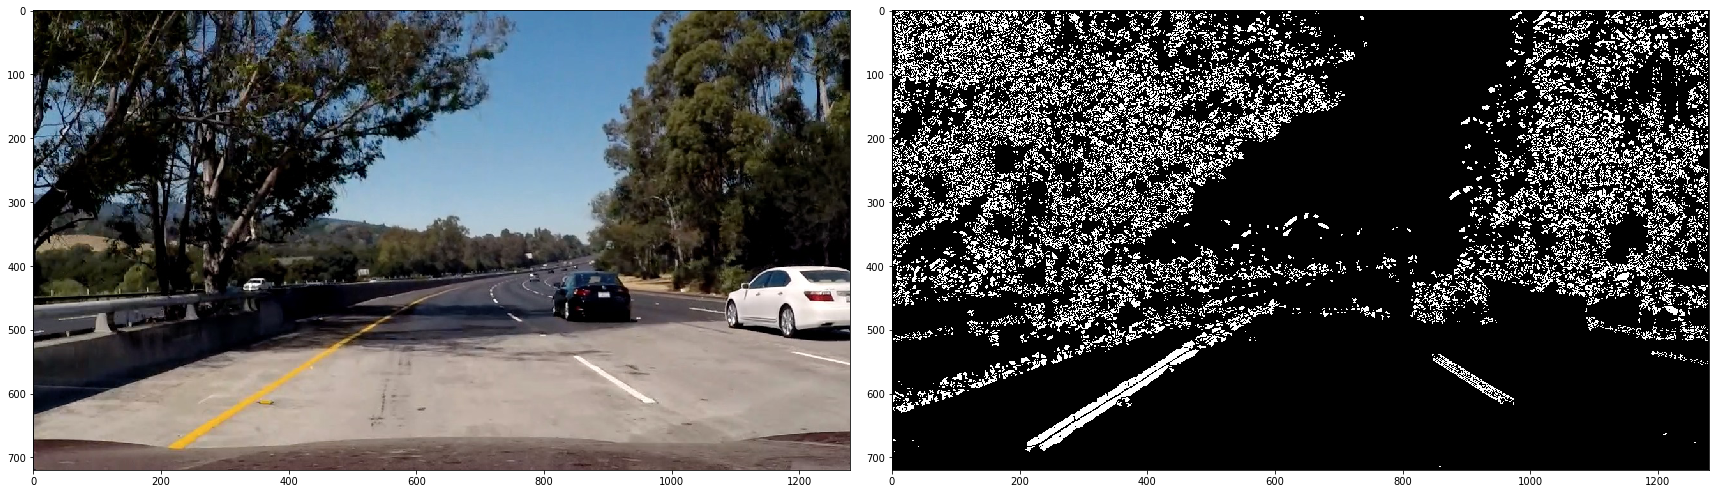

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

# Read in an image and grayscale it
#image = mpimg.imread('signs_vehicles_xygrad.png')
image = mpimg.imread('bridge_shadow.jpg')

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    gray = hls[:,:,2]
    
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    abs_sobel = np.abs(sobel)
    scaled = np.uint8(255.0 * abs_sobel / np.max(abs_sobel))
    
    mask = (scaled >= thresh[0]) & (scaled <= thresh[1])
    grad_binary = np.zeros_like(gray)
    grad_binary[mask] = 1
    
    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    gray = hls[:,:,2]
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    mag = np.sqrt(sobelx ** 2 + sobely ** 2)
    scaled = np.uint8(255.0 * mag / np.max(mag))
    
    mask = (scaled >= mag_thresh[0]) & (scaled <= mag_thresh[1])
    mag_binary = np.zeros_like(gray)
    mag_binary[mask] = 1
    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    gray = hls[:,:,2]
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    dir_sobel = np.arctan2(np.abs(sobely), np.abs(sobelx))
    
    mask = (dir_sobel >= thresh[0]) & (dir_sobel <= thresh[1])
    dir_binary = np.zeros_like(gray)
    dir_binary[mask] = 1
    return dir_binary

# Choose a Sobel kernel size
ksize = 7 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 90))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 140))
mag_binary = mag_thresh(image, sobel_kernel=21, mag_thresh=(30, 90))
dir_binary = dir_threshold(image, sobel_kernel=19, thresh=(40 * np.pi / 180.0, 73 * np.pi / 180))

# plt.figure()
# plt.imshow(mag_binary, cmap='gray')

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24,9))
ax1.imshow(gradx, cmap='gray')
ax1.set_title('gradx', fontsize=20)
ax2.imshow(grady, cmap='gray')
ax2.set_title('grady', fontsize=20)
ax3.imshow(mag_binary, cmap='gray')
ax3.set_title('mag', fontsize=20)
ax4.imshow(dir_binary, cmap='gray')
ax4.set_title('dir', fontsize=20)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(24,9))
f.tight_layout()

ax1.imshow(image)
ax2.imshow(combined, cmap='gray')
plt.show()


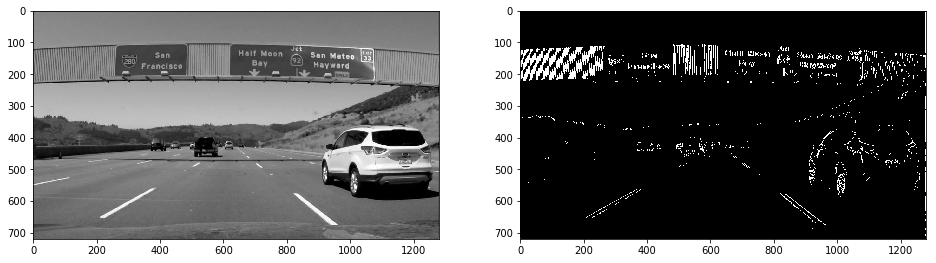

In [91]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('signs_vehicles_xygrad.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobelx = np.abs(sobelx)
sobelx = np.uint8(255.0 * sobelx / np.max(sobelx))

x_only = np.zeros_like(gray)
x_only[np.where((sobelx >= 40) & (sobelx <= 100))] = 1

f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 20))
ax1.imshow(gray, cmap='gray')
ax2.imshow(x_only, cmap='gray')

plt.show()


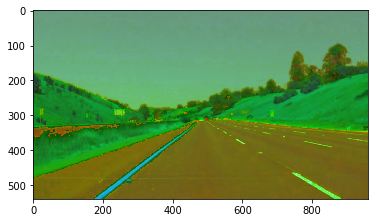

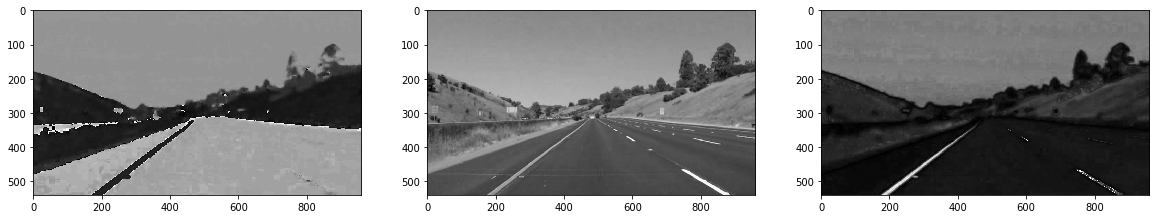

In [103]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('../CarND-LaneLines-P1/test_images/whiteCarLaneSwitch.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
plt.figure()
plt.imshow(img)

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,10))
ax1.imshow(img[:,:,0], cmap='gray')
ax2.imshow(img[:,:,1], cmap='gray')
ax3.imshow(img[:,:,2], cmap='gray')

plt.show()

# RGB Color Space (Masking out lines)

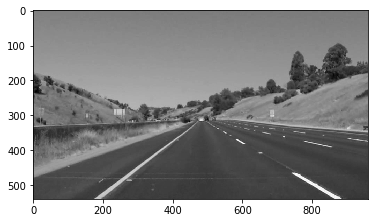

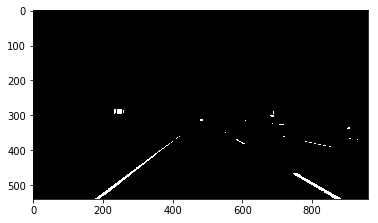

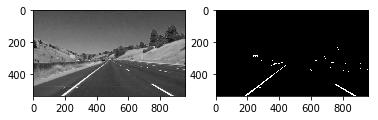

In [112]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('../CarND-LaneLines-P1/test_images/whiteCarLaneSwitch.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

binary = np.zeros_like(gray)
binary[(gray > 200) & (gray < 255)] = 1

plt.imshow(binary, cmap='gray')
plt.show()

R = img[:,:,0]

f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(R, cmap='gray')

binary = np.zeros_like(gray)
binary[(R > 200) & (R < 255)] = 1
ax2.imshow(binary, cmap='gray')
plt.show()


# HLS Color Space

In [113]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('../CarND-LaneLines-P1/test_images/whiteCarLaneSwitch.jpg')
img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

H = img_hls[:,:,0]
L = img_hls[:,:,1]
S = img_hls[:,:,2]

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bridge_shadow.jpg')

def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    h_channel = hsv[:,:,0]
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    color_binary = img
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray =  cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # 3) Take the absolute value of the derivative or gradient
    sobel = np.abs(sobel)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    sobel = np.uint8(255.0 * sobel / np.max(sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    mask = (sobel > thresh_min) & (sobel < thresh_max)
    binary_output = np.zeros_like(gray)
    binary_output[mask] = 1
    # 6) Return this mask as your binary_output image
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude 
    mag = np.sqrt(np.square(sobelx) + np.square(sobely))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled = np.uint8(255.0 * mag / np.max(mag))
    # 5) Create a binary mask where mag thresholds are met
    mask = (scaled >= mag_thresh[0]) & (scaled <= mag_thresh[1])
    
    # 6) Return this mask as your binary_output image
    binary_output = np.zeros_like(gray)
    binary_output[mask] = 1
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)